In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential


In [2]:
import numpy as np
x = np.arange(-1.0, 5.0)
y = np.arange(5.0, 11.0)
x

array([-1.,  0.,  1.,  2.,  3.,  4.])

In [3]:
y

array([ 5.,  6.,  7.,  8.,  9., 10.])

In [4]:
# 시퀀셜 모델
model = Sequential([
  Dense(1),
])
# 10개의 데이터를 1개로 받는다.

In [5]:
# 모델 생성

model.compile(optimizer='sgd', loss='mse')
model.fit(x, y, epochs=1200)


Epoch 1/1200
1/1 [==============================] - 0s 1ms/step - loss: 47.1174
Epoch 2/1200
1/1 [==============================] - 0s 6ms/step - loss: 40.1292
Epoch 3/1200
1/1 [==============================] - 0s 825us/step - loss: 34.5684
Epoch 4/1200
1/1 [==============================] - 0s 754us/step - loss: 30.1319
Epoch 5/1200
1/1 [==============================] - 0s 977us/step - loss: 26.5812
Epoch 6/1200
1/1 [==============================] - 0s 884us/step - loss: 23.7286
Epoch 7/1200
1/1 [==============================] - 0s 2ms/step - loss: 21.4264
Epoch 8/1200
1/1 [==============================] - 0s 3ms/step - loss: 19.5586
Epoch 9/1200
1/1 [==============================] - 0s 2ms/step - loss: 18.0336
Epoch 10/1200
1/1 [==============================] - 0s 983us/step - loss: 16.7794
Epoch 11/1200
1/1 [==============================] - 0s 1ms/step - loss: 15.7395
Epoch 12/1200
1/1 [==============================] - 0s 2ms/step - loss: 14.8691
Epoch 13/1200
1/1 [========

In [6]:
model.predict([10.0])

array([[16.000046]], dtype=float32)

In [7]:
weights = model.get_weights()

In [8]:
weights[0], weights[1]

(array([[1.0000069]], dtype=float32), array([5.999978], dtype=float32))

# TF -2 (문제) Fashion MNIST

In [9]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

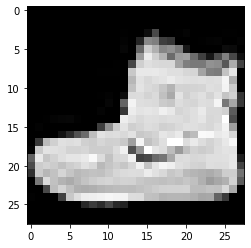

In [12]:
plt.imshow(X_train[0], 'gray')
plt.show()

In [13]:
X_train, X_test = X_train / 255.0, X_test / 255.0 # 리스케일링

# DNN 으로 이미지 문제 풀기

In [14]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint

model = Sequential([
  Flatten(input_shape=(28, 28)),  #일렬
  Dense(128, activation='relu'),  # 펼쳐주기
  Dense(128, activation='relu'),  # 펼쳐주기
  Dense(128, activation='softmax')               
])

In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

# ModelCheckpoint 만들기
1 에폭당 훈련을 하게되면, loss, acc 등이 나온다.

1 에폭 훈련시에 가장 좋았던 가중치와 편향 등을 저장할 수 있게 해준다.

In [16]:
# 체크 포인트 파일 이름 지정하기
checkpoint_path = 'my_checkpoint.ckpt'
checkpoint = ModelCheckpoint(
    filepath = checkpoint_path,
    save_weights_only = True,
    save_best_only = True,
    monitor = 'val_loss', # 검증 세트에 대한 정확도만 살핀다.
    vervose = 1 # 로깅 설정
)

In [17]:
model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=10,
          callbacks=[checkpoint])

model.load_weights(checkpoint_path)


Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5184 - acc: 0.8180 - val_loss: 0.4406 - val_acc: 0.8364
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3692 - acc: 0.8635 - val_loss: 0.3679 - val_acc: 0.8669
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3329 - acc: 0.8775 - val_loss: 0.3785 - val_acc: 0.8660
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3071 - acc: 0.8858 - val_loss: 0.3598 - val_acc: 0.8708
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2919 - acc: 0.8904 - val_loss: 0.3466 - val_acc: 0.8733
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2757 - acc: 0.8972 - val_loss: 0.3443 - val_acc: 0.8768
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2640 - acc: 0.9000 - val_loss: 0.3449 - val_acc: 0.8800
Epoch 8/10
1875/1875 [==============================] - 4s 2ms

# 테스트 세트로 evaluate 할 것 !
근데 우리는 지금 테스트 세트를 검증 세트로 써버려서 쓸 수 있는게 없음

# cat vs dog CNN

In [18]:
import tensorflow_datasets as tfds
import tensorflow as tf

from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

In [24]:
dataset_name = 'cats_vs_dogs'

train_dataset, info = tfds.load(name=dataset_name, split='train[:80%]', with_info=True)
valid_dataset, info = tfds.load(name=dataset_name, split='train[-20%:]', with_info=True)

이미지 리스케일링 및 전처리

In [25]:
def preprocess(features):
  # 이미지 리스케일링
  img, lbl = tf.cast(features['image'], tf.float32) / 255.0, features['label']

  # 이미지 사이즈 조절 tf.image 기능을 사용한다.
  img = tf.image.resize(img, size=(224, 224))

  return img, lbl

데이터 전처리

In [26]:
batch_size = 32

# map : 자료구조에서 데이터를 하나씩 꺼내서 특정 함수를 적용시킨다

train_data = train_dataset.map(preprocess).batch(batch_size) # 전처리 후 배치로 묶기
valid_data = valid_dataset.map(preprocess).batch(batch_size) # 전처리 후 배치로 묶기

In [27]:
total_image_size = info.splits['train'].num_examples
steps_per_epoch = int(total_image_size * 0.8) // batch_size + 1
validation_steps = int(total_image_size * 0.2) // batch_size + 1

In [28]:
model = Sequential([
  Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)),
  MaxPooling2D(2, 2),
  Conv2D(32, (3, 3), activation='relu'),
  MaxPooling2D(2, 2),
  Conv2D(16, (3, 3), activation='relu'),
  MaxPooling2D(2, 2),
  Flatten(),
  Dropout(0.3),
  Dense(512, activation='relu'),
  Dense(128, activation='relu'),
  Dense(2, activation='softmax'), 
  # 출력층에 대한 값이 2개 이상이면 softmax 에 sparse_categorical_crossentropy 사용하면됨

])



RMSProp 사용하기
* 학습률을 학습 도중에 바꿀 수 있다.

In [29]:
# 현재 학습률에 대해 val_loss 가 3번 도는데 나아지지 않으면 학습률을 조정한다. (RMSProp 과 같이 사용됨)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor = 'val_loss',
    factor = 0.1,
    patience = 3,
    min_lr = 0.0001)

optimizer = tf.keras.optimizers.RMSprop(0.001)


# 모델 컴파일

In [30]:
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련

In [36]:
checkpoint_path = 'cat_dog_checkpoint.ckpt'
checkpoint = ModelCheckpoint(
    checkpoint_path,
    save_best_only=True,
    save_weights_only=True,
    monitor='val_loss',
    verbose=1)

In [37]:
import keras
import tensorflow.keras as keras

model.fit(
    train_data,
    validation_data=(valid_data),
    batch_size=32,
    epochs=40,
    callbacks = [checkpoint, reduce_lr])

model.load_weights(checkpoint_path)

Epoch 1/40
    582/Unknown - 36s 62ms/step - loss: 0.0277 - accuracy: 0.9915
Epoch 00001: val_loss improved from inf to 1.48590, saving model to cat_dog_checkpoint.ckpt
582/582 [==============================] - 45s 77ms/step - loss: 0.0277 - accuracy: 0.9915 - val_loss: 1.4859 - val_accuracy: 0.7741
Epoch 2/40
581/582 [============================>.] - ETA: 0s - loss: 0.0242 - accuracy: 0.9924
Epoch 00002: val_loss improved from 1.48590 to 1.44576, saving model to cat_dog_checkpoint.ckpt
582/582 [==============================] - 44s 76ms/step - loss: 0.0241 - accuracy: 0.9924 - val_loss: 1.4458 - val_accuracy: 0.7872
Epoch 3/40
582/582 [==============================] - ETA: 0s - loss: 0.0261 - accuracy: 0.9927
Epoch 00003: val_loss did not improve from 1.44576
582/582 [==============================] - 44s 76ms/step - loss: 0.0261 - accuracy: 0.9927 - val_loss: 1.6013 - val_accuracy: 0.7803
Epoch 4/40
582/582 [==============================] - ETA: 0s - loss: 0.0249 - accuracy: 0.99